# **Detect Traffic Signs with Deep Learning**
---

![Traffic lights over urban intersection.](traffic.jpg)

## **Introduction**

This project, you will explore the challenges associated with traffic sign detection and management, particularly focusing on the detection of stop signs and traffic lights. Traffic signs play a crucial role in ensuring road safety by conveying essential information to drivers. However, their visibility can be compromised due to varying lighting conditions, angles, or obstructions. 

The goal of this project is to address the challenges faced in modern transportation systems using Keras. 
This project aligns with the growing need for automated systems in traffic management, contributing to safer and more efficient roadways.

Data Source: `batch.npy` provided by [https://www.datacamp.com/datalab]


### Import required libraries

In [334]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

#### Load a preprocessed images and the corresponding labels

In [337]:
image, labels = np.load('batch.npy',allow_pickle=True).tolist()

#### hyperparameters

- `input_size` is dimension of input image, which is 2.
- `num_classes` represents number of classes, for this its 224.
- `DROPOUT_FACTOR` is the dropout probability, **0.2** chosen to prevent overfitting.

In [341]:
input_size = image.shape[1] 
num_classes = labels['classifier_head'].shape[1] 
DROPOUT_FACTOR = 0.2

#### visualize some examples preprocessed image:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..144.061].


(-0.5, 223.5, 223.5, -0.5)

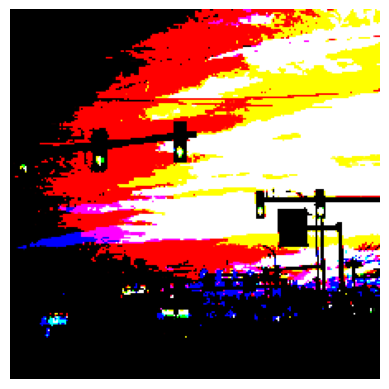

In [344]:
plt.imshow(image[1])
plt.axis("off")

## **Define an object detection model**


#### Create a sequential model - a linear stack of layers

In [348]:
model= keras.Sequential()

- Feature extractor: This part of the model extracts features from the input images
- Convolutional layer with 16, 32 and 64 filters. Each filter with a size of 3x3, using ReLU activation function
- Input shape is the size of the input image: (input_size, input_size, 3) - 3 channels for RGB images
- Average pooling layers to reduce spatial dimensions by taking the average value in each 2x2 patch
- Dropout layers to prevent overfitting by randomly dropping a fraction of the units during training

In [351]:
model.add(keras.Input(shape=(input_size, input_size, 3)))
model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu'))
model.add(keras.layers.AveragePooling2D(2, 2))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(keras.layers.AveragePooling2D(2, 2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(keras.layers.Dropout(DROPOUT_FACTOR))
model.add(keras.layers.AveragePooling2D(2, 2))

### Model adaptor: This part of the model adapts the extracted features for classification
#### Flatten layer to convert the 3D feature maps into a 1D feature vector

In [354]:
model.add(keras.layers.Flatten())

#### Dense (fully connected) layer with 64 neurons and ReLU activation

In [357]:
model.add(keras.layers.Dense(64, activation='relu'))

### Classifier head: This part of the model performs the actual classification
#### Dense layer with 64 neurons and ReLU activation

In [360]:
model.add(keras.layers.Dense(64, activation='relu'))

#### Output layer with 'num_classes' neurons and softmax activation, representing class probabilities


In [363]:
model.add(keras.layers.Dense(num_classes, activation='softmax', name='classifier_head'))

#### Compile the model: Define optimizer, loss function, and evaluation metrics


In [366]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model using the data generator:
- 'image' contains the input images, 'labels' contains corresponding labels
- Epochs determine how many times the entire dataset is passed forward and backward through the network, running training loop for 20 epochs due to the small size of the training data



In [369]:
history = model.fit(image, labels['classifier_head'], epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - accuracy: 0.4167 - loss: 5.7802
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5000 - loss: 21.8427
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5000 - loss: 39.5228
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5000 - loss: 5.6085
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5000 - loss: 10.5431
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7500 - loss: 0.3740
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.0093
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 7.6742e-05
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 7.9473e-07
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 1.00

#### Print the training accuracy

In [371]:
accuracy = history.history['accuracy'][-1]
print(f"Training accuracy: {accuracy}")

Training accuracy: 1.0


Good result because:
- This suggests model is achieving 100% accuracy on the training dataset
-  the model is perfectly classifying or detecting all the training examples correctly.

Bad result because:
* It is a small data set as it only uses 12 images.
* Could be because of overfitting


# Improving The Model
---

## Import necessary libraries:
- `EarlyStopping`- used  to stop the training process early if the model's performance on the validation dataset stops improving, so preventing overfitting
- `ModelCheckpoint`- used to save the model at certain points during training, usually when it reaches the best performance on a particular metric i.e. validation accuracy

In [375]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### Define callbacks for early stopping and saving the best model

In [380]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

### Re-compile the model with a lower learning rate

In [383]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model with validation data and callbacks

In [386]:
history = model.fit(image, labels['classifier_head'], 
                    epochs=50, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step - accuracy: 1.0000 - loss: 9.5367e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 3.4438e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 9.2718e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 5.2982e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 1.3245e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 1.3245e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


### Plot training & validation accuracy values

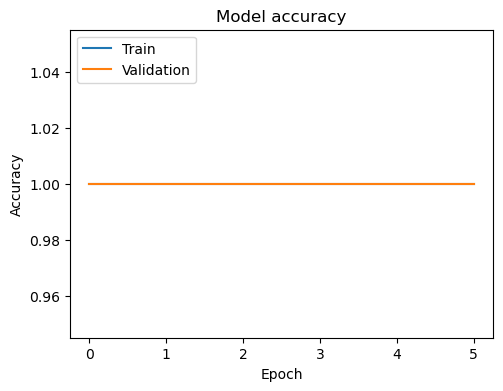

In [389]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

### Plot training & validation loss values

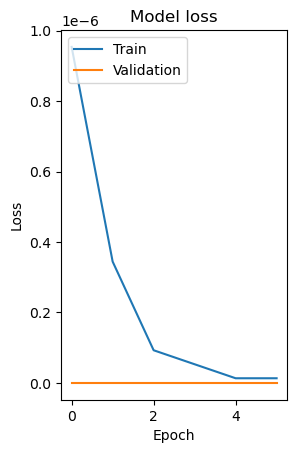

In [392]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Does not seem to be any overfitting as minimal gap between `training accuracy` and `validation accuracy`

## Confusion matrix and classification report

In [396]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### Predict the labels for the validation set

In [399]:
val_predictions = model.predict(image[int(len(image)*0.8):])
val_predictions_classes = val_predictions.argmax(axis=-1)
val_true_classes = labels['classifier_head'][int(len(labels['classifier_head'])*0.8):].argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


### Compute the confusion matrix

In [402]:
conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)

### Plot the confusion matrix

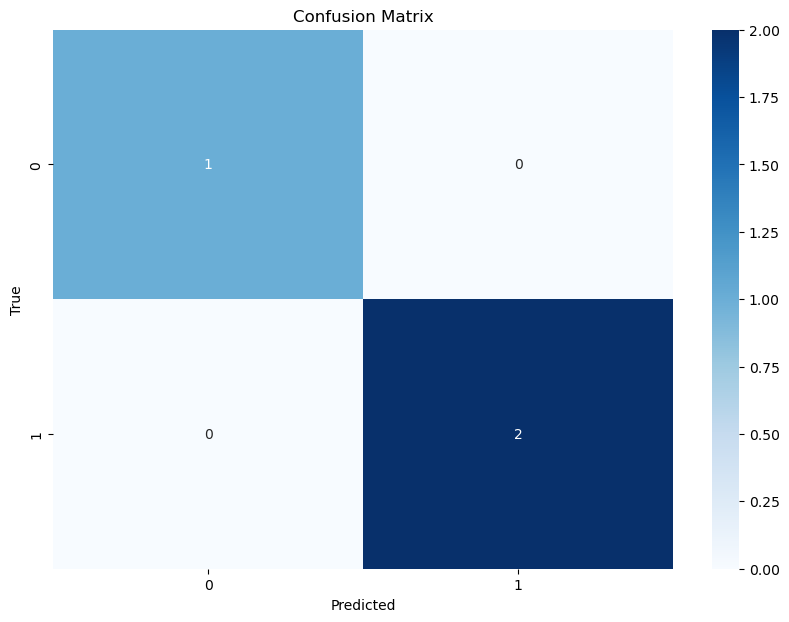

In [405]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Print the classification report

In [408]:
class_report = classification_report(val_true_classes, val_predictions_classes)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## Using other Activation Functions

### Import libraries

In [412]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

### Let's define a function to create a model with a specified activation function and evaluate its performance

In [415]:
def create_model(activation='relu'):
    model = Sequential([
        Input(shape=(image.shape[1], image.shape[2], image.shape[3])),
        Flatten(),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(labels['classifier_head'].shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Split the data into training and validation sets

In [418]:
X_train, X_val, y_train, y_val = train_test_split(image, labels['classifier_head'], test_size=0.2, random_state=42)

### List of activation functions to try

In [421]:
activations = ['relu', 'tanh', 'sigmoid', 'elu']

### Dictionary to store the results



In [424]:
results = {}

### Evaluate the model on the validation set

In [427]:
for activation in activations:
    print(f"Training with activation: {activation}")
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0)
    
    
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    results[activation] = val_accuracy

Training with activation: relu
Training with activation: tanh
Training with activation: sigmoid
Training with activation: elu


### Display the results


In [430]:
results

{'relu': 0.6666666865348816,
 'tanh': 0.3333333432674408,
 'sigmoid': 0.3333333432674408,
 'elu': 0.3333333432674408}

Other activations does not improve model

# Conclusion

Model Evaluation:
- Despite the fact that training data small, after improving the model, `training` accuracy and `validation` accuracy gaps were minimal. Thus no overfitting.
- Minimal loss in model, shows model was accurate
- excellent classification report shows good model accuracy
- after using different activations it did not improve model accuracy

Overall this is a good model but for a better model, using more images would be ideal and using more epochs per loop. Also adding more layers could improve the module further.